irises classes are:  ['setosa' 'versicolor' 'virginica']
The predict y value is that is the iris type  [1]


The predict y value is that is the iris type  [2]


Confusion Matrix is 
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Confusion matrix, without normalization
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Normalized confusion matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


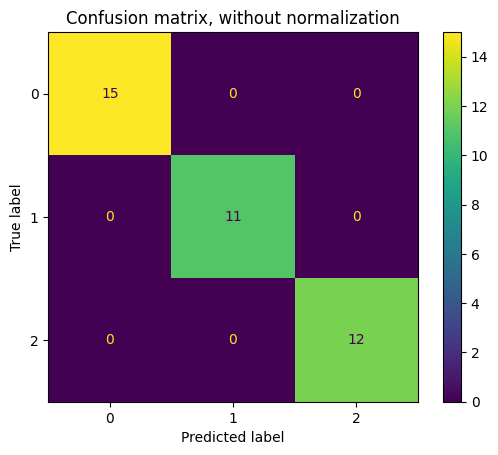

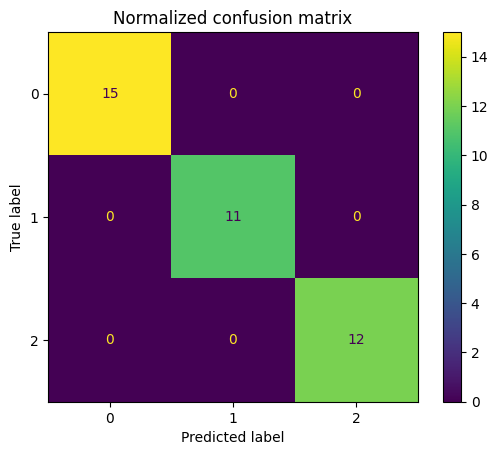

In [ ]:
#https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
#Part 2 Vary the number of layers and perceptrons
#MLP Classifier for irises

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


irises = datasets.load_iris()
X = irises.data
y = irises.target
class_names = irises.target_names
print("irises classes are: ", class_names)


#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create an MLP model with 4 hidden layers with varying number of perceptrons in each layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)

#Fit the model
classifier = mlp.fit(X_train,y_train)

#Prediction
y_pred = mlp.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
new_input = [[5, 3.2, 1.2, 0.4]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the iris type ", new_y)
print("\n")

new_input2 = [[7.8, 2.5, 6.5, 1.9]]
new_y2 = mlp.predict(new_input2)
print("The predict y value is that is the iris type ", new_y2)
print("\n")


#Model Evaluation
#https://scikit-learn.org/stable/modules/model_evaluation.html
#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()